# THIS PROJECT IS A DETAILED ANALYSIS OF THE MEDIUM PUBLICATIONS

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
medium = pd.read_csv("/kaggle/input/medium-articles-dataset/medium_data.csv")

In [3]:
medium.shape

(6508, 10)

In [4]:
medium.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [5]:
medium.tail() 

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing,2019-12-05
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing,2019-12-05
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing,2019-12-05
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing,2019-12-05
6507,6508,https://medium.com/better-marketing/how-to-wri...,How To Write a Good Business Blog Post,An A-to-Z guide for non-writers,6508.jpg,147,0,9,Better Marketing,2019-12-05


In [6]:
medium.dtypes

id               int64
url             object
title           object
subtitle        object
image           object
claps            int64
responses       object
reading_time     int64
publication     object
date            object
dtype: object

In [7]:
medium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


## Top 5 medium publications by the total number of claps

In [8]:
x=medium.groupby('publication')["claps"].sum().sort_values(ascending=False)[:5]
x

publication
The Startup                922651
Towards Data Science       414386
UX Collective              211413
Better Marketing           200702
The Writing Cooperative    150216
Name: claps, dtype: int64

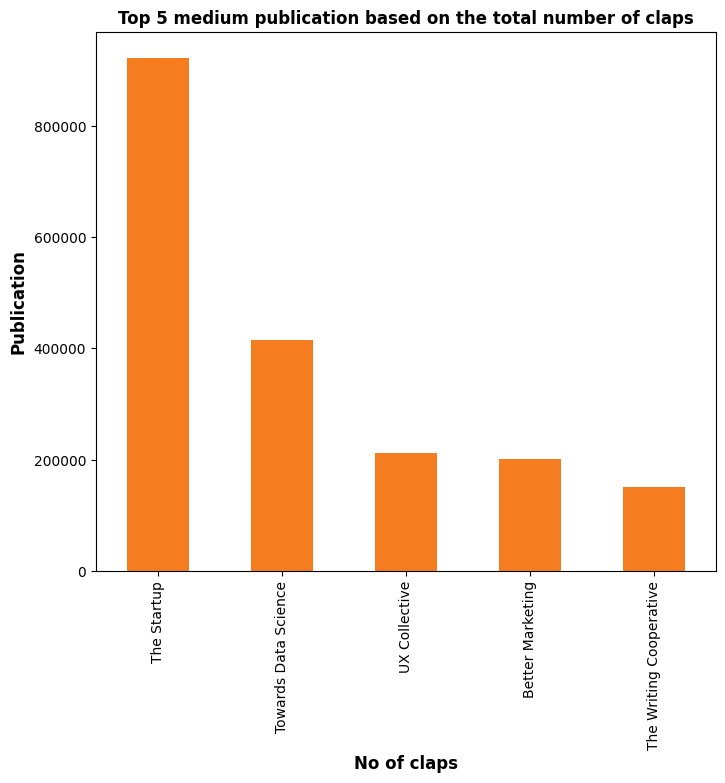

In [9]:
x.plot.bar(color='#F57D1F',figsize=(8,7))
plt.xlabel('No of claps',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel('Publication',fontdict={'fontsize':12,'fontweight':'bold'})
plt.title('Top 5 medium publication based on the total number of claps',
          fontdict={'fontsize':12,'fontweight':'bold'});

In [10]:
medium.columns.tolist()

['id',
 'url',
 'title',
 'subtitle',
 'image',
 'claps',
 'responses',
 'reading_time',
 'publication',
 'date']

In [11]:
medium.select_dtypes(include='object')

,url,title,subtitle,image,responses,publication,date
0,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,8,Towards Data Science,2019-05-30
1,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,11,Towards Data Science,2019-05-30
2,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,1,Towards Data Science,2019-05-30
3,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,0,Towards Data Science,2019-05-30
4,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,3,Towards Data Science,2019-05-30
...,...,...,...,...,...,...,...
6503,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,6,Better Marketing,2019-12-05
6504,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,1,Better Marketing,2019-12-05
6505,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,1,Better Marketing,2019-12-05
6506,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,2,Better Marketing,2019-12-05


In [12]:
medium.dtypes

id               int64
url             object
title           object
subtitle        object
image           object
claps            int64
responses       object
reading_time     int64
publication     object
date            object
dtype: object

In [13]:
medium['date']=pd.to_datetime(medium['date'])

In [14]:
medium.dtypes

id                       int64
url                     object
title                   object
subtitle                object
image                   object
claps                    int64
responses               object
reading_time             int64
publication             object
date            datetime64[ns]
dtype: object

## Maximum Number of claps

In [15]:
medium['claps'].max()

38000

## Identify the artcile with the highest number of claps

In [16]:
dfmaxclap = medium[medium.claps==38000]

In [17]:
dfmaxclap

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
4552,4553,https://medium.com/swlh/i-have-15-ideas-to-cha...,I Have 15 ideas To Change Your Life. Do you Ha...,NaN,4553.png,38000,170,5,The Startup,2019-05-20


* The article with the highest number of claps is:
"I Have 15 ideas To Change Your Life. Do you Have 5 Minutes?"

## Get the articles with the 25000 clap of less

In [18]:
df25korbelowclaps = medium.query('claps<=25000')

In [19]:
df25korbelowclaps.head(3)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30


In [20]:
len(df25korbelowclaps)

6507

## Get the articles with more than 3000 claps

In [21]:
dfabove3000claps = medium.query('claps>3000')

In [22]:
dfabove3000claps.head(3)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
36,37,https://medium.com/swlh/i-just-shut-down-my-st...,I just shut down my startup. Here’s what I lea...,NaN,37.jpeg,5900,60,16,The Startup,2019-05-30
37,38,https://medium.com/swlh/developers-here-is-the...,Developers — here is the most convincing reaso...,A senior dev whom I respect…,38.jpeg,4800,27,7,The Startup,2019-05-30
38,39,https://medium.com/swlh/how-to-retain-more-fro...,How To Retain More From The Books You Read,Making sure you get the most out of reading.,39.png,11700,58,5,The Startup,2019-05-30


In [23]:
len(dfabove3000claps)

77

In [24]:
len(medium)

6508

In [25]:
medium['publication'].nunique()

7

In [26]:
medium['publication'].unique()

array(['Towards Data Science', 'UX Collective', 'The Startup',
       'The Writing Cooperative', 'Data Driven Investor',
       'Better Marketing', 'Better Humans'], dtype=object)

In [27]:
z=medium['publication'].value_counts(sort=True)
z

publication
The Startup                3041
Towards Data Science       1461
Data Driven Investor        778
UX Collective               555
The Writing Cooperative     403
Better Marketing            242
Better Humans                28
Name: count, dtype: int64

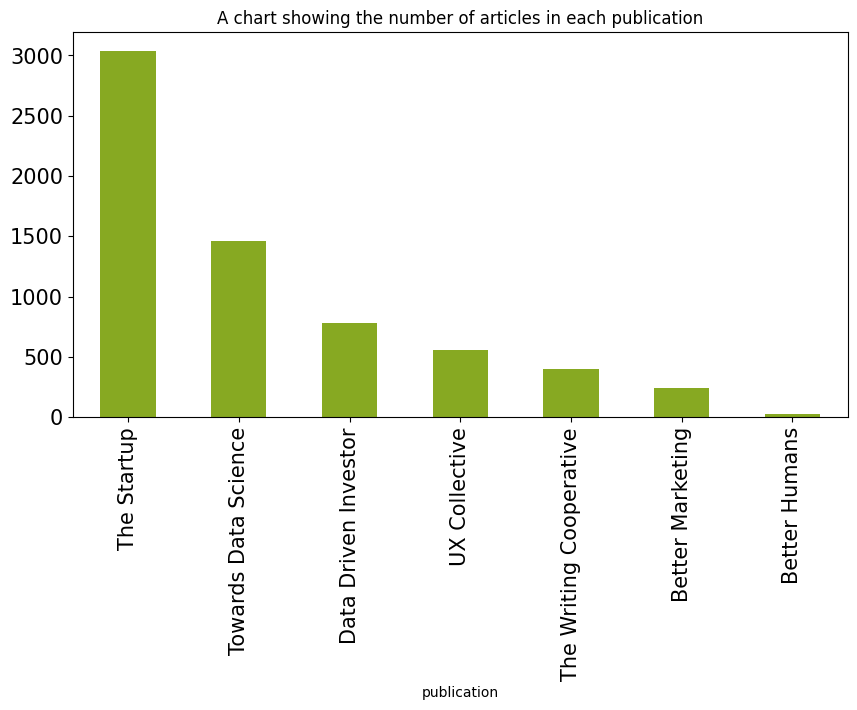

In [28]:
z.plot(kind='bar',figsize=(10,5),color='#87A922',fontsize=15,
       title='A chart showing the number of articles in each publication',);

In [29]:
medium.query("responses=='Read'")

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
3977,3978,https://medium.com/datadriveninvestor/what-do-...,What do you think of the Open Group’s Data Sci...,NaN,3978.jpg,73,Read,3,Data Driven Investor,2019-05-24
6392,6393,https://uxdesign.cc/please-please-please-tell-...,"UX doesn’t discriminate, it targets behaviours",NaN,NaN,74,Read,5,UX Collective,2019-12-05


In [30]:
medium['responses'].replace("Read",0,inplace = True)

## Top 5 Medium publications by the total reading minutes

In [31]:
readmin = medium.groupby('publication')['reading_time'].sum().sort_values(ascending=False)[:5]

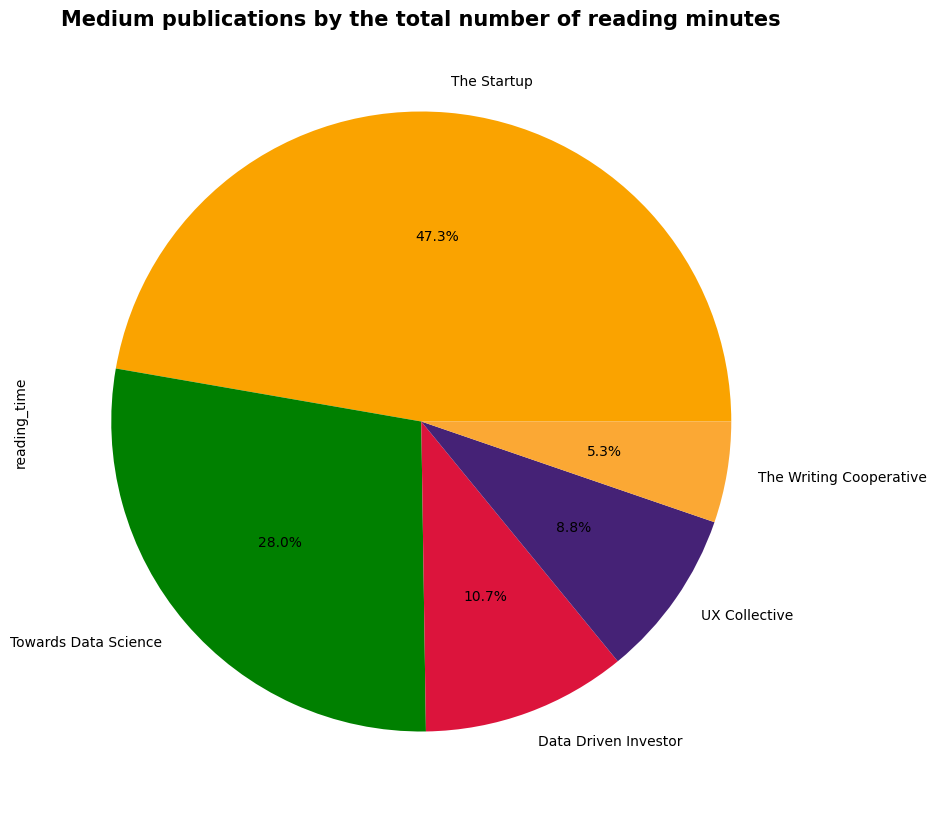

In [32]:
readmin.plot.pie(figsize=(10,12),colors=['#FAA300','green','crimson','#452276','#FBA834'],
                 autopct='%1.1f%%')
plt.title('Medium publications by the total number of reading minutes',
          fontdict={'fontsize':15,'fontweight':'bold'});